# Task2: Stock Price Prediction

# Importig Libraries

In [79]:
import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [80]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [81]:
df=pd.read_excel("stock_data.xlsx")

In [82]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [83]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [84]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [85]:
df.shape

(2035, 8)

In [86]:
df.isnull().sum().sum()

0

In [87]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [88]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [89]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2035 non-null   datetime64[ns]
 1   Open                  2035 non-null   float64       
 2   High                  2035 non-null   float64       
 3   Low                   2035 non-null   float64       
 4   Last                  2035 non-null   float64       
 5   Close                 2035 non-null   float64       
 6   Total Trade Quantity  2035 non-null   int64         
 7   Turnover (Lacs)       2035 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 127.3 KB


In [91]:
df.duplicated().sum()

0

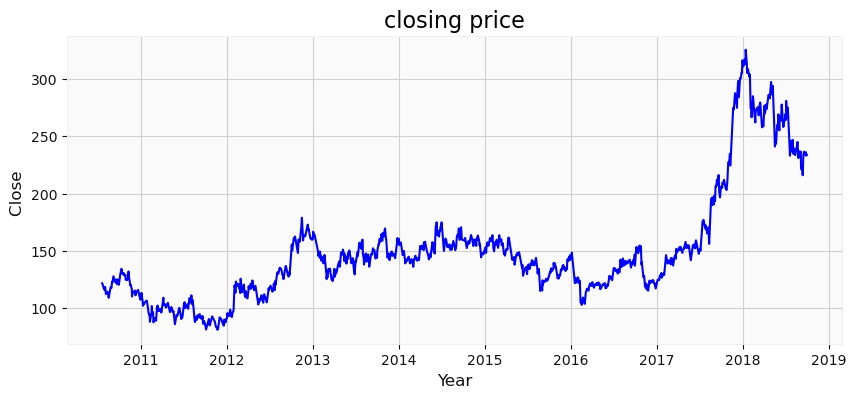

In [92]:
plt.figure(figsize=(10,4))
plt.grid(True)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Close ', fontsize=12)
plt.plot(df['Date'], df['Close'],color='blue')
plt.title('closing price',fontsize=16)
plt.show()

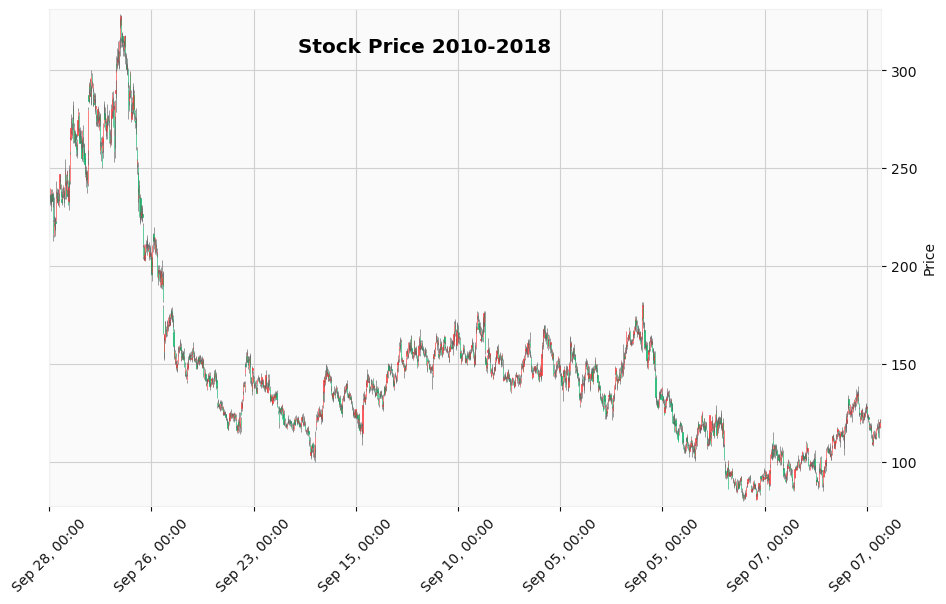

In [93]:
import mplfinance as mpf
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
mpf.plot(df,figratio=(20,12),type="candle",title='Stock Price 2010-2018',tight_layout=True,style='yahoo')


Text(0.5, 1.0, 'Correlation')

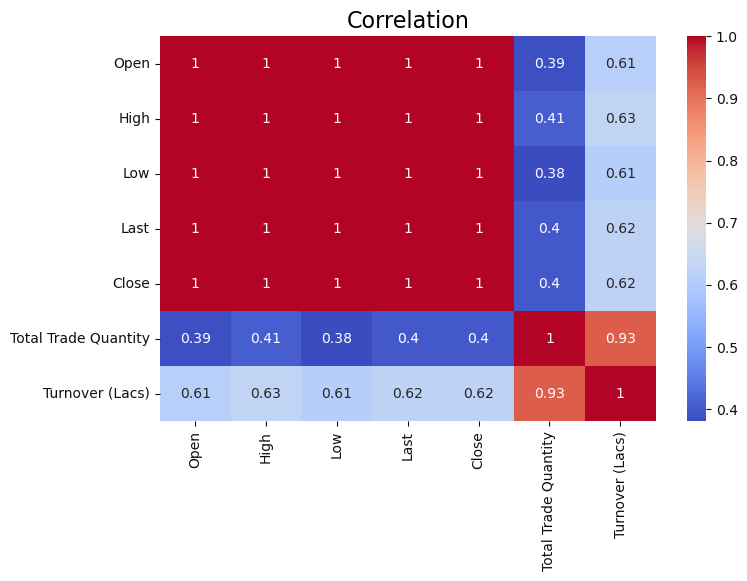

In [112]:
plt.figure(figsize=(8,5))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.title("Correlation", fontsize=16)

In [95]:
X=df.drop(['Close','Date'],axis=1)
y=df['Close']

In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
sc=StandardScaler()

In [98]:
X_sc=sc.fit_transform(X)

In [99]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=11)

In [100]:
clf=LinearRegression()

In [101]:
clf.fit(X_train,y_train)

LinearRegression()

In [102]:
clf.score(X_test,y_test)

0.9999221418308699

In [103]:
y_pred=clf.predict(X_test)

In [104]:
print("MSE :",round(mean_squared_error(y_test, y_pred), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred),3))

MSE : 0.188
RMSE : 0.433
MAE : 0.286
MAPE : 0.002


In [105]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [106]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 6, 50)             10400     
                                                                 
 lstm_7 (LSTM)               (None, 6, 50)             20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [107]:
model.fit(X, y, epochs=100, batch_size=32)

Epoch 1/100
64/64 [==============================] - 8s 13ms/step - loss: 22798.0391
Epoch 2/100
64/64 [==============================] - 1s 10ms/step - loss: 20807.4375
Epoch 3/100
64/64 [==============================] - 1s 12ms/step - loss: 19822.0801
Epoch 4/100
64/64 [==============================] - 1s 12ms/step - loss: 18930.1934
Epoch 5/100
64/64 [==============================] - 1s 10ms/step - loss: 18092.6445
Epoch 6/100
64/64 [==============================] - 1s 10ms/step - loss: 17297.0254
Epoch 7/100
64/64 [==============================] - 1s 10ms/step - loss: 16535.8965
Epoch 8/100
64/64 [==============================] - 1s 10ms/step - loss: 15809.0869
Epoch 9/100
64/64 [==============================] - 1s 10ms/step - loss: 15113.0156
Epoch 10/100
64/64 [==============================] - 1s 10ms/step - loss: 14445.6182
Epoch 11/100
64/64 [==============================] - 1s 10ms/step - loss: 13806.6328
Epoch 12/100
64/64 [==============================] - 1s 10ms/s

In [108]:
train_predict=model.predict(X_train)

51/51 [==============================] - 1s 4ms/step


In [109]:
test_predict=model.predict(X_test)

13/13 [==============================] - 0s 4ms/step


In [110]:
print(predictions)

[[200.64479 ]
 [200.64522 ]
 [200.6465  ]
 ...
 [121.724434]
 [121.790344]
 [122.57415 ]]
